<a href="https://colab.research.google.com/github/Sriharshitha842/ML_LAB/blob/main/ML_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME OF THE STUDENT : SRIHARSHITHA DEEPALA**

**REG NO : 19BCD7246**

**COURSE CODE : CSE3008**

**LAB NO : 05**

# **UNIVARIATE LINEAR REGRESSION**

In [1]:
#load the data and libraries
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv('/content/sample_data/Order.csv')
data.head()

,Amount,Quantity
0,1275,7
1,66,5
2,8,3
3,80,4
4,168,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Amount    1500 non-null   int64
 1   Quantity  1500 non-null   int64
dtypes: int64(2)
memory usage: 23.6 KB


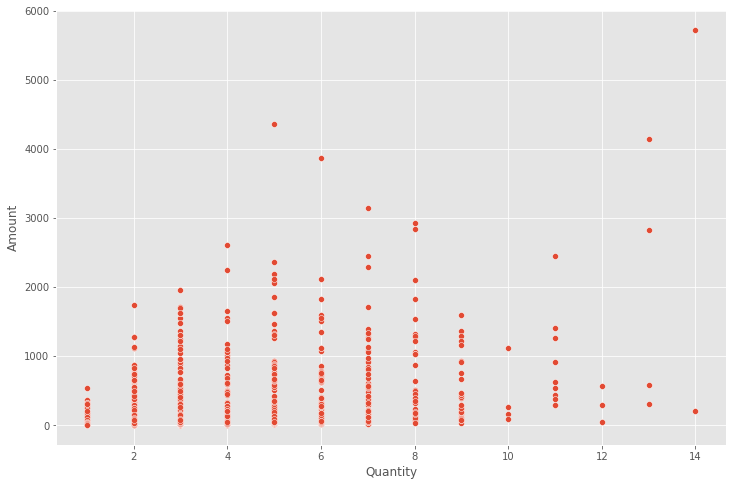

In [6]:
#visualizing data
ax = sns.scatterplot(x='Quantity',y='Amount',data=data)
ax

In [7]:
#compute the cost
def cost_fun(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y)**2
    return 1/(2*m) * np.sum(error)

In [26]:
m = data.Quantity.values.size
X = np.append(np.ones((m, 1)), data.Quantity.values.reshape(m, 1),axis = 1)
y = data.Amount.values.reshape(m, 1)
theta = np.zeros((2,1))
cost_fun(X,y,theta)

147589.35933333333

In [12]:
#Gradient Descent
def gradient(X,y,theta, alpha,iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(),(y_pred - y))
        theta-= alpha * 1/m *error
        costs.append(cost_fun(X,y,theta))
    return theta, costs

In [14]:
theta , costs = gradient(X, y, theta, alpha = 0.01, iterations=1500)
print('h(x) = {} + {}x1'.format(str(round(theta[0,0],2)) ,
                                   str(round(theta[1,0,],2))))

h(x) = 9.59 + 74.29x1


Text(0.5, 1.0, 'values of cost function over iterations of G.D')

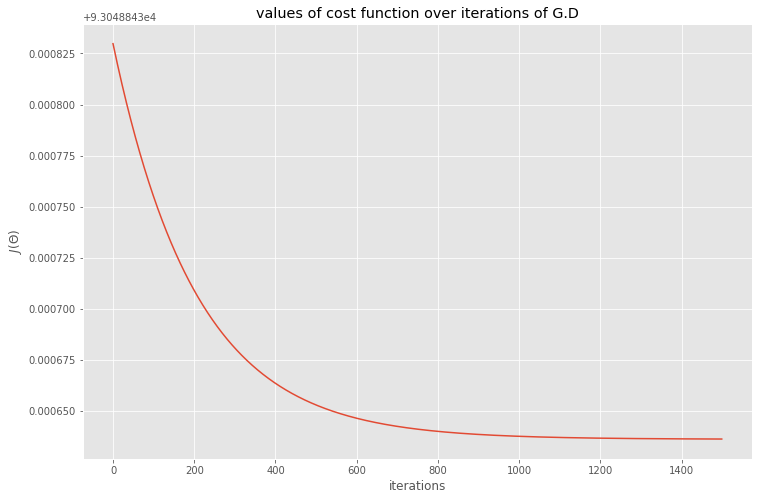

In [15]:
#plotting the convergence
plt.plot(costs)
plt.xlabel('iterations')
plt.ylabel('$J(\Theta)$')
plt.title('values of cost function over iterations of G.D')

In [16]:
#training data with regression fit
theta.shape

(2, 1)

In [17]:
theta

array([[ 9.58653849],
       [74.28718766]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'linear reg,. fit')

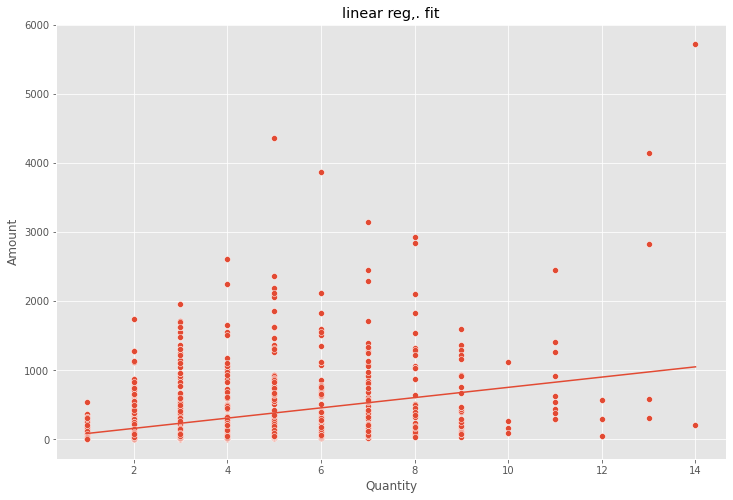

In [19]:
theta = np.squeeze(theta)
sns.scatterplot(x='Quantity',y='Amount',data=data)
x_value = [x for x in range(1,15)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)
plt.xlabel("Quantity")
plt.ylabel("Amount")
plt.title("linear reg,. fit")

# **MULTIVARIATE LINEAR REGRESSION**

In [27]:
#import libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [53]:
df = pd.read_csv('/content/sample_data/house_data.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'])
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


In [54]:
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


In [55]:
df.shape

(21613, 6)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [57]:
df['bathrooms'] = df['bathrooms'].astype('int')

In [59]:
df['bedrooms'] = df['bedrooms'].replace(33,3)

In [60]:
#handiling missing values
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

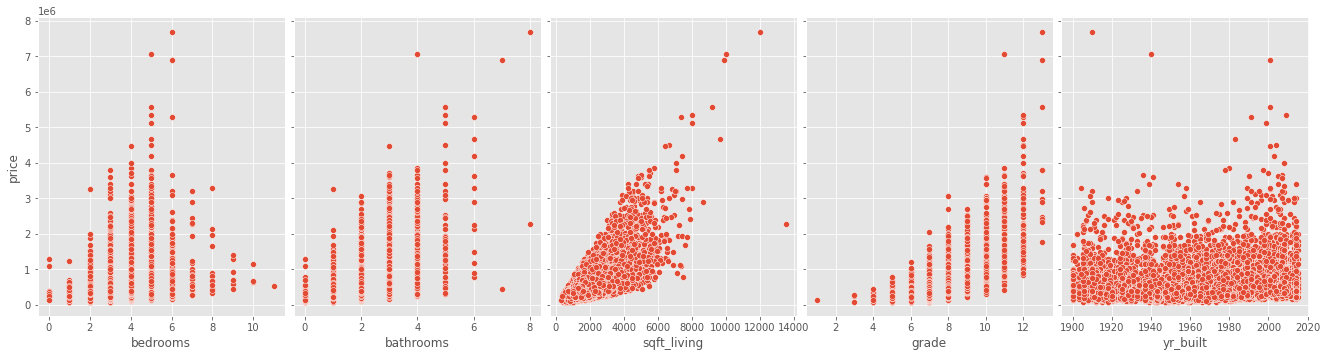

In [67]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars=['price'], size=5, aspect=0.75)
plt.show()

In [71]:
#modelling
x = df.drop(columns='price')
y = df['price']

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [73]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 5)
(17290,)
(4323, 5)
(4323,)


In [74]:
lin_reg = LinearRegression()

In [75]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-53061.75464279  64658.55790617    188.90926343 131290.89536823
  -3969.55831454]
7031568.245717696


In [77]:
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,bedrooms,-53061.754643
1,bathrooms,64658.557906
2,sqft_living,188.909263
3,grade,131290.895368
4,yr_built,-3969.558315


In [78]:
y_pred = lin_reg.predict(x_test)

In [79]:
lin_reg.score(x_test, y_test)
#i.e., accuracy score is 61.25%

0.6125113286941101